# Data Mining

# Professor Sara Ross-Howe

# Summative Group Project: Phase 1

## Government Accountability with Open Data

## Sean Kuehl, Dominic Pham, Mason Ward

### Phase 1: Problem Definition, Data Collection, and Data Preparation

#### Problem Definition: Sean Kuehl

All of us pay taxes, but almost none of us can say with confidence exactly where it's going. One of the places our government spends our tax dollars is on travel and hospitality for it's many ministers and ministries. These individuals are given discretion to use tax money if they feel a certain travel or hospitality event is necessary, but as a tax payer you may ask yourself: are these events always necessary? In this analysis we will use data from the Government of Canada's Open Data Initiative to investigate ministerial travel and hospitality expenses for interesting patterns and trends that could help us find possible efficeincies, waste or corruption in the use of our tax dollars. 

#### Data Collection: Sean Kuehl

##### Dataset Sources and Information.

For this project, we will be using two datasets from the Government of Canada's open data portal. These datasets are the Proactive Disclosure of Travel Expenses[1], and the Proactive Disclosure of Hospitality Expenses[2]. These datasets are updated daily, so it is worth noting that these datasets are as they were retrieved on July 19th, 2024. These resources are used under the Open Government License[3].

##### References

[1] Governemnt of Canada. (2024, July, 19). Proactive Disclosure - Travel Expenses[Data set]. Treasury Board of Canada Secretariat. https://open.canada.ca/data/en/dataset/009f9a49-c2d9-4d29-a6d4-1a228da335ce
 
[2] Governemnt of Canada. (2024, July, 19). Proactive Disclosure - Hospitality Expenses[Data set]. Treasury Board of Canada Secretariat. https://open.canada.ca/data/en/dataset/b9f51ef4-4605-4ef2-8231-62a2edda1b54

[3] Open Government - Government of Canada. (2013, April 26). Open Government Licence - Canada. Retrieved from http://open.canada.ca/en/open-government-licence-canada 


##### Loading and Tranformation of Datasets Overview

These datasets contain many similar columns that they will be joined on to form one single transactional database. The general columns they share are:  Reference Number, Disclosure Group, Title(English), Title(French), Name, Purpose(English), Purpose(French), start date, end date, Location(English), Location(French), Total Amount, Additional Comments(English), Additional Comments(French), owner_org, owner_org_title. The Name, Location(English) and Location(French) columns of both datasets will need to be cleaned before they can be intgrated with the other data. The name column has several formatting issues such as "Kuehl, Sean" vs. "Sean Kuehl" issues along with several occurences of improper capitalization usage. Additionally, a new column will be added once the integration is complete, a "Transaction Type" column that will indicate whether an expense was Hospitality or Travel related.

##### Loading and Tranformation of the Travel Expenses Dataset

This dataset has a total of 116,543 entries and 19 attributes. The attributes are as follows with description where required.

-Reference Number

-Disclosure Group: This is the group to which the person belongs. Which is either "MPSES" for Minister/Ministerial adviser/Ministerial staff/Parliamentary Secretary/Exempt Staff or "SLE" for Senior officer or employee

-Title(English): This is the position of the person who traveled in English

-Title(English): This is the position of the person who traveled in French

-Name

-Purpose of Travel(English): A short explanation of the reason for the travel in English

-Purpose of Travel(French): A short explanation of the reason for the travel in French

-Travel Start Date

-Travel End Date

-Place Visited(English)

-Place Visited(French)

-Airfare: Cost of airplace tickets

-Other Transportation: Cost of other transportation

-Lodging: Cost of accomodations

-Meals and Incidentals: Cost of meals and the like

-Other Expenses: Any additional expenses not belonging to one of the previous kinds

-Total Amount

-Additional Comments(English)

-Additional Comments(French



##### Loading the Dataset

In [1]:
import pandas as pd

travel_data = pd.read_csv("travel expenses.csv", parse_dates=[7, 8])

print(travel_data)

             ref_number disclosure_group                    title_en  \
0       T-20120-P11-001              SLE     Chief Executive Officer   
1       T-2020-P11-0001              SLE                       Chair   
2       T-2020-P11-0002              SLE                  Vice Chair   
3       T-2020-P11-0003              SLE          Board Of Directors   
4       T-2020-P11-0004              SLE          Board Of Directors   
...                 ...              ...                         ...   
116538     T-2022-P2-03              NaN         Chair of YESA Board   
116539     T-2022-P1-06              NaN          Executive Director   
116540     T-2022-P3-02              NaN  Executive Committee member   
116541     T-2022-P3-03              NaN  Executive Committee member   
116542     T-2022-P4-01              NaN  Executive Committee member   

                              title_fr                 name  \
0          Président directeur-général     Philip Rizcallah   
1        

##### Dropping uneeded columns

The airfare, other_transport, lodging, meals and other_expenses columns have no counterpart in the other dataset and don't have any information that is valuable enough on their own to warrant keeping them. For this reason, we will remove these columns.

In [2]:
travel_data.drop(columns=['airfare', 'other_transport', 'lodging', 'meals', 'other_expenses'], inplace=True)

print(travel_data)

             ref_number disclosure_group                    title_en  \
0       T-20120-P11-001              SLE     Chief Executive Officer   
1       T-2020-P11-0001              SLE                       Chair   
2       T-2020-P11-0002              SLE                  Vice Chair   
3       T-2020-P11-0003              SLE          Board Of Directors   
4       T-2020-P11-0004              SLE          Board Of Directors   
...                 ...              ...                         ...   
116538     T-2022-P2-03              NaN         Chair of YESA Board   
116539     T-2022-P1-06              NaN          Executive Director   
116540     T-2022-P3-02              NaN  Executive Committee member   
116541     T-2022-P3-03              NaN  Executive Committee member   
116542     T-2022-P4-01              NaN  Executive Committee member   

                              title_fr                 name  \
0          Président directeur-général     Philip Rizcallah   
1        

##### Cleaning Name column

The name column use a variety of formats that make identifying the same person across records sometimes difficult. A good example is Philip Rizcallah. Sometimes his name is written in as "Philip Rizcallah" and sometimes as "Rizcallah, Philip". There are other individuals like this and this will decrease the quality of the data and it's ability to be used for pattern finding and the ability to rely on the name columns as attributes in general. There is another case where an individuals fill name is given. For example, "Sean L. Kuehl". There is also the case where some names have odd capitalization, for instance the whole of the first name being capitalized for an unkown reason. For data cleaning purposes, I have chosen to flip the order of and remove the comma from the "Rizcallah, Philip" type of case. I will leave the other two cases unaffected, except for making them lowercase to deal with the aforementioned capitalization issue.

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
import math 

def name_cleaning_function(raw_name):
    
    if type(raw_name) is str:
        clean_name = ""

        raw_name = raw_name.strip()      #remove any leading or trailing whitespace

        raw_name = raw_name.split(',')    #break up the names based on commas.If the name has no commas, it will just be a single string in a list. Else, it will be split into two elements, one the text before and the other the text after the comma.

        if len(raw_name) == 1:
            #if it doesn't contain any commas, it's fine as is.
            #this is the case if it is a first name, last name or full name with middle name case
            #it will still need the lower case modification performed on it
            clean_name = raw_name[0].lower()

        elif len(raw_name) > 1:
            #there was a comma and the order elements will need to be reversed and lowercased
            clean_name = raw_name[1] +" "+raw_name[0]
            clean_name = clean_name.lower()

        return clean_name
    
    else:
        #it's a nan and of type float. We'll deal with these later
        #ignore for now
        pass


for x in range(0,len(travel_data['destination_en'])):
    this_name = travel_data['name'][x]
    travel_data['name'][x] = name_cleaning_function(this_name)
               
               
print(travel_data['name'])
        

0            philip rizcallah
1          paul-claude bérubé
2                   mary reid
3           joseph mclaughlin
4                maureen haan
                 ...         
116538           lauren haney
116539           kim winnicky
116540         nicloux dennis
116541         dennis nicloux
116542        bryony mcintyre
Name: name, Length: 116543, dtype: object


##### Cleaning Location columns

The dataset contains location columns in both English and French. The columns contain locations is an incredible amount of variations. Let us use a visit to Toronto, for example. This might be written as "Toronto" or "Toronto, ON" or "Toronto, ON, Canada" or "Toronto, Ontario, Canada" or even "Toronto (Ontario) Canada" or even yet "Toronto, On". This only becomes more complicated when multiple locations are shown in the same entry. Because there are too many variations to allow a single rule to help for all cases, I have chosen instead to just apply a lowercase conversion to all rows. This will at least solve the "Toronto, ON" and "Toronto, On" inconsistency. Outside of this, all 100,000+ rows would need to be evaluated manually to convert them into a single consistent format.

In [4]:
for x in range(0,len(travel_data['name'])):
    if type(travel_data['destination_en'][x]) is str:
        #nan's are floats, so this checks if it's usable
        travel_data['destination_en'][x] = (travel_data['destination_en'][x]).lower()
    
    if type(travel_data['destination_fr'][x]) is str:
        #nan's are floats, so this checks if it's usable
        travel_data['destination_fr'][x] = (travel_data['destination_fr'][x]).lower()
    

print(travel_data['destination_en'])
print(travel_data['destination_fr'])

0                regina, saskatchewan, canada
1         vancouver, british columbia, canada
2         vancouver, british columbia, canada
3         vancouver, british columbia, canada
4         vancouver, british columbia, canada
                         ...                 
116538                     dawson city, yukon
116539                       yellowknife, nwt
116540                     dawson city, yukon
116541                        old crow, yukon
116542                        old crow, yukon
Name: destination_en, Length: 116543, dtype: object
0            regina, saskatchewan, canada
1         vancouver, colombie-britannique
2         vancouver, colombie-britannique
3         vancouver, colombie-britannique
4         vancouver, colombie-britannique
                       ...               
116538                 dawson city, yukon
116539                   yellowknife, tno
116540                 dawson city, yukon
116541                    old crow, yukon
116542                

##### Loading and Tranformation of the Hospitality Expenses Dataset

The hospitality expenses dataset has 59,023 entries and 18 attributes. The attributes are as follows with description where required.

-Reference Number

-Disclosure Group: same groups as previous dataset

-Title(English)

-Title(French)

-Name

-purpose of hospitality activity(English)

-purpose of hospitatlity activity(French)

-start date

-end date

-municipality where the hospitality activity took place(English)

-municipality where the hospitality activity took place(French)

-Name of commercial establishment or vendor involved in the hospitality activity (English): If a commercial establishment or vendor provided the hospitality they must best mentioned.

-Name of commercial establishment or vendor involved in the hospitality activity (French)

-Attendees (Government of Canada Officials)

-Attendees (Guests)

-Total cost

-Additional Comments(English)

-Additional Comments(French)

##### Loading the Dataset

In [5]:
import pandas as pd

hosp_data = pd.read_csv("hospitality expenses.csv", parse_dates=[7, 8])

print(hosp_data)

             ref_number disclosure_group  \
0         H-2020-P1-001              SLE   
1        H-2023-P11-001              SLE   
2        H-2023-P12-001              SLE   
3         H-2024-P3-001              SLE   
4         H-2024-P4-001              SLE   
...                 ...              ...   
59014   H-2023-P8-00001              SLE   
59015  H-2023-P12-00001              SLE   
59016  H-2024-P02-00001              SLE   
59017  H-2024-P04-00001              SLE   
59018  H-2024-P04-00002              SLE   

                                                title_en  \
0                                Chief Executive Officer   
1                                Chief Executive Officer   
2                                Chief Executive Officer   
3                                Chief Executive Officer   
4                                Chief Executive Officer   
...                                                  ...   
59014                                    Deputy Min

##### Dropping uneeded columns

The English and French vendor columns along with the employee attendees and guest attendees columns have no corresponding column in the other dataset and don't have enough value in and of themselves to warrant keeping them. For this reason we will be removing them.

In [6]:
hosp_data.drop(columns=['vendor_en', 'vendor_fr', 'employee_attendees', 'guest_attendees'], inplace=True)

print(hosp_data)

             ref_number disclosure_group  \
0         H-2020-P1-001              SLE   
1        H-2023-P11-001              SLE   
2        H-2023-P12-001              SLE   
3         H-2024-P3-001              SLE   
4         H-2024-P4-001              SLE   
...                 ...              ...   
59014   H-2023-P8-00001              SLE   
59015  H-2023-P12-00001              SLE   
59016  H-2024-P02-00001              SLE   
59017  H-2024-P04-00001              SLE   
59018  H-2024-P04-00002              SLE   

                                                title_en  \
0                                Chief Executive Officer   
1                                Chief Executive Officer   
2                                Chief Executive Officer   
3                                Chief Executive Officer   
4                                Chief Executive Officer   
...                                                  ...   
59014                                    Deputy Min

##### Cleaning Name column

This dataset has a similar name column with similar issues. For this reason, the same transformation that was applied to the previous name column will again be applied to this one.

In [7]:
for x in range(0,len(hosp_data['location_en'])):
    this_name = hosp_data['name'][x]
    hosp_data['name'][x] = name_cleaning_function(this_name)
               
               
print(hosp_data['name'])

0         philip rizcallah
1         philip rizcallah
2         philip rizcallah
3         philip rizcallah
4         philip rizcallah
               ...        
59014        frances mcrae
59015        gail mitchell
59016        frances mcrae
59017        frances mcrae
59018        frances mcrae
Name: name, Length: 59019, dtype: object


##### Cleaning Location columns

This dataset also has a location column but with one key difference. There is often a location or locations added in brackets or mixed into the location. These are usually business names where supplies were bought or events took place. This extra attribute crammed into the location column has no counterpart in the other dataset and is too varied and inconsistently recorded to warrant keeping. We can detect and remove the brackets, but there is no good way to make a single rule to remove it from the location in the other case. Just to clarify, the "Super C, Costco, IGA, Art-is-in, Rideau Bakery, Sconewitch, Ottawa, ON" will be left alone, but the "Mlt, QC (Delta Montreal)" type case will be simplified to just the location We will clean the location column by removing these and applying a lowercase conversion like we did before.

In [8]:
def location_cleaning_function(raw_location):
    
    clean_location = ""
    collect = True
    
    if type(raw_location) is str:
        #nan's are float and not string and would throw an error here
    
        for x in raw_location:
            if x == ')':
                collect = False
            elif x == '(':
                collect = True

            if collect == True:
                clean_location += x

        return clean_location
    
    else:
        return raw_location
    
    
    
for x in range(0,len(hosp_data['location_en'])):
    hosp_data['location_en'][x] = location_cleaning_function(hosp_data['location_en'][x])
    hosp_data['location_fr'][x] = location_cleaning_function(hosp_data['location_fr'][x])
    
               
               
print(hosp_data['location_en'])
print(hosp_data['location_fr'])

0           Vancouver, BC, Canada
1        Montreal, Quebec, Canada
2        Toronto, Ontario, Canada
3        Gatineau, Quebec, Canada
4        Gatineau, Quebec, Canada
                   ...           
59014     Ottawa, Ontario, Canada
59015    Gatineau, Quebec, Canada
59016    Gatineau, Quebec, Canada
59017     Ottawa, Ontario, Canada
59018    Gatineau, Quebec, Canada
Name: location_en, Length: 59019, dtype: object
0           Vancouver, CB, Canada
1        Montréal, Québec, Canada
2        Toronto, Ontario, Canada
3        Gatineau, Québec, Canada
4        Gatineau, Québec, Canada
                   ...           
59014     Ottawa, Ontario, Canada
59015    Gatineau, Québec, Canada
59016    Gatineau, Québec, Canada
59017     Ottawa, Ontario, Canada
59018    Gatineau, Québec, Canada
Name: location_fr, Length: 59019, dtype: object


##### Combining dataframes into one dataset

Now that we've completed the essential cleaning it's time to combine these into a single data cube. Some of the column names do not match up so we will rename them before combining the data. We'll also be adding an "expense type" column to help us distinguish between them and find patterns later.

In [9]:
import numpy as np

travel_data_column = ["Travel"] * len(travel_data['destination_en'])
hosp_data_column = ["Hospitality"] * len(hosp_data['location_en'])

travel_data["expense_type"] = travel_data_column
hosp_data["expense_type"] = hosp_data_column

travel_data.rename(columns={"destination_en": "location_en", "destination_fr": "location_fr"}, inplace=True)
hosp_data.rename(columns={"description_fr": "purpose_fr", "description_en": "purpose_en"}, inplace=True)


combined_data = pd.concat([travel_data, hosp_data], ignore_index=True)

print(combined_data)



              ref_number disclosure_group  \
0        T-20120-P11-001              SLE   
1        T-2020-P11-0001              SLE   
2        T-2020-P11-0002              SLE   
3        T-2020-P11-0003              SLE   
4        T-2020-P11-0004              SLE   
...                  ...              ...   
175557   H-2023-P8-00001              SLE   
175558  H-2023-P12-00001              SLE   
175559  H-2024-P02-00001              SLE   
175560  H-2024-P04-00001              SLE   
175561  H-2024-P04-00002              SLE   

                                                 title_en  \
0                                 Chief Executive Officer   
1                                                   Chair   
2                                              Vice Chair   
3                                      Board Of Directors   
4                                      Board Of Directors   
...                                                   ...   
175557                          

##### Loading and Retrieving Data Into Relational Database

In [10]:
%pip install pymysql

# Import dataframe into MySQL
import pymysql
from sqlalchemy import create_engine
database_username = 'root'
database_password = 'TimeGone'
database_ip       = '127.0.0.1'
database_name     = 'mydb'


database_connection = create_engine('mysql+pymysql://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
combined_data.to_sql(con=database_connection, name='expenditure_table', if_exists='replace')


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\turqo\miniconda3\envs\homl3\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


175562

In [11]:
from sqlalchemy.sql import text

with database_connection.connect() as con:

    rs = con.execute(text('SELECT * FROM expenditure_table LIMIT 10'))
    
    

    for row in rs:
        print(row)

(0, 'T-20120-P11-001', 'SLE', 'Chief Executive Officer', 'Président directeur-général', 'philip rizcallah', 'To attend meeting with Saskatchewan Provincial Government', 'Pour assister à une réunion avec le gouvernement provincial de la Saskatchewan', datetime.datetime(2020, 2, 3, 0, 0), '2020-02-04', 'regina, saskatchewan, canada', 'regina, saskatchewan, canada', 1118.46, None, None, 'casdo-ocena', 'Accessibility Standards Canada | Normes d’accessibilité Canada', 'Travel')
(1, 'T-2020-P11-0001', 'SLE', 'Chair', 'Président', ' paul-claude bérubé', 'Board members meeting', 'Réunion du conseil', datetime.datetime(2020, 2, 9, 0, 0), '2020-02-13', 'vancouver, british columbia, canada', 'vancouver, colombie-britannique', 2597.14, None, None, 'casdo-ocena', 'Accessibility Standards Canada | Normes d’accessibilité Canada', 'Travel')
(2, 'T-2020-P11-0002', 'SLE', 'Vice Chair', 'vice-présidente', ' mary reid', 'Board members meeting', 'Réunion du conseil', datetime.datetime(2020, 2, 9, 0, 0), '2

##### ERD of Data

An ERD diagram of the data in the relational database has been made and submitted as an image with this notebook. See attached.

#### Data Preparation (Missing and Duplicate Data): Dominic Pham

In this section, the data that we have collected in the previous step will now be checked for missing and duplicate values. Using imputation methods, we will find the most suitable method for this dataset to fill in the missing values and eliminate duplications to reduce data redundacy.

##### Duplication Removal

For duplication removal, it is most appropriate to drop rows that are duplicates in the dataset and we also check the dataset again after the duplication removals to ensure that the dataset does not contain duplicates.

In [12]:
combined_data = combined_data.drop_duplicates()

duplicates = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


##### Missing Values

We first check the dataset to see how many missing values it contains and which columns contain missing values. 

In [13]:
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ref_number                     2
disclosure_group           29217
title_en                    1763
title_fr                    1798
name                        1559
purpose_en                    40
purpose_fr                   138
start_date                     0
end_date                    3701
location_en                 2106
location_fr                 1560
total                        271
additional_comments_en    152987
additional_comments_fr    154340
owner_org                      0
owner_org_title                0
expense_type                   0
dtype: int64


We can observe that in the dataset there are missing values in majority of the columns of the dataset and that it includes both numerical and categorical columns that contain th missing values. For imputing the missing values, the most suitable method is to use simple imputer as it is a straight forward method handle missing data and is appropriate for the complexity of the dataset as well. 

For imputing the missing values for numerical columns, we decided on using the mean for the imputation strategy as it is a common method for imputing numerical columns by using the mean value as it minimizes the sum of squared difference between original and imputed values. 

For imputing the missing values for categorical columns, we decided on using the most frequent imputation strategy as it is most effective for imputing the values for categorical columns using vlaues that occur the most and it is a liekly value for the missing values. For the `name` column, we decided to impute the missing values separately by filling the missing value with 'Unknown' as it would be more appropriate to use 'Unknown' rather than using the most frequent name as it would provide more meaningful context. 

In [14]:
from sklearn.impute import SimpleImputer

combined_data_imputed = combined_data.copy()

num_cols = combined_data_imputed.select_dtypes(include=['float64', 'int64']).columns
cat_cols = combined_data_imputed.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

combined_data_imputed[num_cols] = num_imputer.fit_transform(combined_data_imputed[num_cols])
combined_data_imputed[cat_cols] = cat_imputer.fit_transform(combined_data_imputed[cat_cols])

combined_data_imputed['name'] = combined_data_imputed['name'].fillna('Unknown')

missing_values_after_imputation = combined_data_imputed.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 ref_number                0
disclosure_group          0
title_en                  0
title_fr                  0
name                      0
purpose_en                0
purpose_fr                0
start_date                0
end_date                  0
location_en               0
location_fr               0
total                     0
additional_comments_en    0
additional_comments_fr    0
owner_org                 0
owner_org_title           0
expense_type              0
dtype: int64


In [15]:
combined_data = combined_data_imputed

#### Data Preparation (Outliers and Binning): Mason Ward

In this section, we will be detecting outliers and choosing a method of mitigating them. The outlier detection methods being used are the z-score method, IQR method, and isolation forest method.

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest


# Z-Score method
combined_data['Z-Score'] = zscore(combined_data['total'])
z_score_threshold = 3
outliers_z = combined_data[np.abs(combined_data['Z-Score']) > z_score_threshold]

# IQR method
Q1 = combined_data['total'].quantile(0.25)
Q3 = combined_data['total'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = combined_data[(combined_data['total'] < (Q1 - 1.5 * IQR)) | (combined_data['total'] > (Q3 + 1.5 * IQR))]

# Isolation Forest method
iso_forest = IsolationForest(contamination=0.1, random_state=0)
combined_data['IsolationForest'] = iso_forest.fit_predict(combined_data[['total']])
outliers_iso = combined_data[combined_data['IsolationForest'] == -1]

print("Outliers detected by Z-Score method:")
print(outliers_z[['ref_number', 'total']])

print("\nOutliers detected by IQR method:")
print(outliers_iqr[['ref_number', 'total']])

print("\nOutliers detected by Isolation Forest method:")
print(outliers_iso[['ref_number', 'total']])


Outliers detected by Z-Score method:
                   ref_number       total
53255         T-2016-Q2-00010   309309.00
53259         T-2016 Q2-00014   313313.00
53260         T-2016 Q2-00015   314314.00
53261         T-2016 Q2-00016   315315.00
63904        T-2013-P12-00055   666387.00
64694        T-2015-P08-00024   115005.00
64695        T-2015-P08-00011   922199.00
122349          H-2023-P9-003    47081.58
126726        H-2007-Q4-00076    45663.72
155265       H-2014-P08-00015  5395900.00
156187       H-2014-P11-00080    44750.69
157645       H-2016-P01-00110    91940.00
165795   ADMPOL-H-2017-Q3-004   255223.64
166032  Corp Sec-2017-Q3-0012    97948.40
166291   ADMPOL-H-2018-Q3-003   154704.00
166468          H-2019-P3-010    45420.45
166624        H-2019-P9-00020    51392.40
170902        H-2019-Q3-00001   156809.90
174259         H-2024-P03-012    70279.46

Outliers detected by IQR method:
              ref_number     total
38        T-2023-P7-0001  14495.91
92        T-2024-P6

Each method has detected a reasonable number of outliers, many of which are likely common across the methods. We are going to combine the detected outliers and then cap them, to mitgate their impact on analysis.

In [17]:
cap_low, cap_high = combined_data['total'].quantile([0.01, 0.99])

# Apply the caps
combined_data['total_capped'] = np.clip(combined_data['total'], cap_low, cap_high)

print("\nData after capping outliers:")
print(combined_data[['ref_number', 'total', 'total_capped']])


Data after capping outliers:
              ref_number    total  total_capped
0        T-20120-P11-001  1118.46       1118.46
1        T-2020-P11-0001  2597.14       2597.14
2        T-2020-P11-0002  4128.74       4128.74
3        T-2020-P11-0003  1076.91       1076.91
4        T-2020-P11-0004  2037.19       2037.19
...                  ...      ...           ...
175557   H-2023-P8-00001     4.24          4.24
175558  H-2023-P12-00001   724.22        724.22
175559  H-2024-P02-00001   586.37        586.37
175560  H-2024-P04-00001    35.39         35.39
175561  H-2024-P04-00002   252.45        252.45

[175562 rows x 3 columns]


We can visualize the difference in the data before and after capping, to make sure it worked as well.

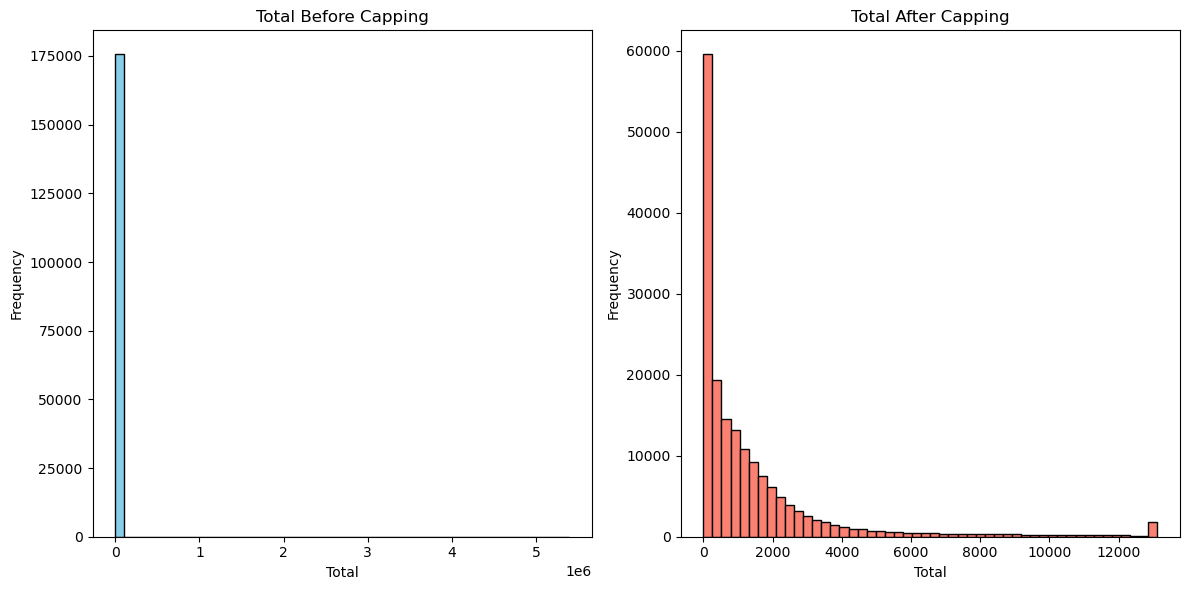

In [18]:
import matplotlib.pyplot as plt

# Visualize the impact of capping on the 'total' column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(combined_data['total'], bins=50, color='skyblue', edgecolor='black')
plt.title('Total Before Capping')
plt.xlabel('Total')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(combined_data['total_capped'], bins=50, color='salmon', edgecolor='black')
plt.title('Total After Capping')
plt.xlabel('Total')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The next thing we're going to do is discretize the numerical columns into bins, as well as turning nominal and ordinal columns into a numerical representation.

First, we're dropping the outlier detection columns created in the previous step, and then encoding the nominal and ordinal columns using Label Encoder. 

In [19]:
from sklearn.preprocessing import LabelEncoder

encoded_data = combined_data

# Dropping the outlier detection columns first

# List of columns to drop
columns_to_drop = ['Z-Score', 'IsolationForest', 'total', 'total_capped']

# Drop the specified columns
encoded_data = encoded_data.drop(columns=columns_to_drop)

label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['ref_number', 'disclosure_group', 'title_en', 'title_fr', 'name', 'purpose_en', 
                     'purpose_fr', 'location_en', 'location_fr', 'additional_comments_en', 
                     'additional_comments_fr', 'owner_org', 'owner_org_title', 'expense_type']

# Apply label encoding to each of the columns
for column in columns_to_encode:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Display the first few rows of the encoded data
print(encoded_data.head())

   ref_number  disclosure_group  title_en  title_fr  name  purpose_en  \
0       71210                 3      1605      3915  6884       68095   
1       90495                 3      1500      3905  2723       18514   
2       90499                 3      4975      6950  2275       18514   
3       90500                 3      1407      3573  1691       18514   
4       90501                 3      1407      3573  2316       18514   

   purpose_fr start_date    end_date  location_en  location_fr  \
0       49619 2020-02-03  2020-02-04        20084        21521   
1       69206 2020-02-09  2020-02-13        24999        26868   
2       69206 2020-02-09  2020-02-14        24999        26868   
3       69206 2020-02-09  2020-02-12        24999        26868   
4       69206 2020-02-09  2020-02-12        24999        26868   

   additional_comments_en  additional_comments_fr  owner_org  owner_org_title  \
0                    4634                    4235          7                0   
1 

Next is binning. For the encoded data, we are using range binning. Because the values assigned to encoded data are arbitrary, binning them in an unbiased way makes sure we don't make misleading conclusions based on the bins, while keeping same-binned items together.

In [20]:
# Binning

# ref_number
encoded_data['ref_number_binned'] = pd.cut(encoded_data['ref_number'], bins=[0, 20000, 70000, float('inf')], labels=['Low', 'Medium', 'High'])

# disclosure_group
encoded_data['disclosure_group_binned'] = encoded_data['disclosure_group'].map({1: 'Low', 2: 'Medium', 3: 'High'})

# title_en
encoded_data['title_en_binned'] = pd.cut(encoded_data['title_en'], bins=[0, 1500, 3000, float('inf')], labels=['Low', 'Medium', 'High'])

# title_fr
encoded_data['title_fr_binned'] = pd.cut(encoded_data['title_fr'], bins=[0, 3500, 7000, float('inf')], labels=['Low', 'Medium', 'High'])

# name
encoded_data['name_binned'] = pd.cut(encoded_data['name'], bins=[0, 2000, 6000, float('inf')], labels=['Low', 'Medium', 'High'])

# purpose_en
encoded_data['purpose_en_binned'] = pd.cut(encoded_data['purpose_en'], bins=[0, 20000, 70000, float('inf')], labels=['Low', 'Medium', 'High'])

# purpose_fr
encoded_data['purpose_fr_binned'] = pd.cut(encoded_data['purpose_fr'], bins=[0, 50000, 90000, float('inf')], labels=['Low', 'Medium', 'High'])

# location_en
encoded_data['location_en_binned'] = pd.cut(encoded_data['location_en'], bins=[0, 20000, 40000, float('inf')], labels=['Low', 'Medium', 'High'])

# location_fr
encoded_data['location_fr_binned'] = pd.cut(encoded_data['location_fr'], bins=[0, 20000, 40000, float('inf')], labels=['Low', 'Medium', 'High'])

# additional_comments_en
encoded_data['additional_comments_en_binned'] = pd.cut(encoded_data['additional_comments_en'], bins=[0, 5000, 10000, float('inf')], labels=['Low', 'Medium', 'High'])

# additional_comments_fr
encoded_data['additional_comments_fr_binned'] = pd.cut(encoded_data['additional_comments_fr'], bins=[0, 5000, 10000, float('inf')], labels=['Low', 'Medium', 'High'])

# owner_org
encoded_data['owner_org_binned'] = encoded_data['owner_org'].map(
    lambda x: 'Low' if x in range(0, 21) else ('Medium' if x in range(21, 61) else ('High' if x >= 61 else 'Unknown'))
)

# owner_org_title
encoded_data['owner_org_title_binned'] = encoded_data['owner_org_title'].map(
    lambda x: 'Low' if x in range(0, 21) else ('Medium' if x in range(21, 61) else ('High' if x >= 61 else 'Unknown'))
)

# expense_type
encoded_data['expense_type_binned'] = encoded_data['expense_type'].map({0: 'Low', 1: 'High'})

print(encoded_data)


        ref_number  disclosure_group  title_en  title_fr  name  purpose_en  \
0            71210                 3      1605      3915  6884       68095   
1            90495                 3      1500      3905  2723       18514   
2            90499                 3      4975      6950  2275       18514   
3            90500                 3      1407      3573  1691       18514   
4            90501                 3      1407      3573  2316       18514   
...            ...               ...       ...       ...   ...         ...   
175557       52974                 3      2311      4602  4782       22829   
175558       52702                 3       920      5345  4848       35731   
175559       53175                 3      2311      4602  4782       35785   
175560       53265                 3      2311      4602  4782       25581   
175561       53266                 3      2311      4602  4782       35731   

        purpose_fr start_date             end_date  location_en

For the date-time columns, we also used range binning, but set the bins to correspond with the years, which span from 2003 onwards

In [21]:
# Convert start_date and end_date to datetime, handling blank values
encoded_data['start_date'] = pd.to_datetime(encoded_data['start_date'], errors='coerce')
encoded_data['end_date'] = pd.to_datetime(encoded_data['end_date'], errors='coerce')

# Extract the year from the dates
encoded_data['start_year'] = encoded_data['start_date'].dt.year
encoded_data['end_year'] = encoded_data['end_date'].dt.year

# Define the year bins
year_bins = list(range(2003, 2099)) #2003 is the earliest year and 2099 is the latest in our dataset

# Binning start_year
encoded_data['start_year_binned'] = pd.cut(
    encoded_data['start_year'], 
    bins=year_bins, 
    labels=[str(year) for year in year_bins[:-1]]
)

# Binning end_year
encoded_data['end_year_binned'] = pd.cut(
    encoded_data['end_year'], 
    bins=year_bins, 
    labels=[str(year) for year in year_bins[:-1]]
)


# Print the binned data
print(encoded_data)

        ref_number  disclosure_group  title_en  title_fr  name  purpose_en  \
0            71210                 3      1605      3915  6884       68095   
1            90495                 3      1500      3905  2723       18514   
2            90499                 3      4975      6950  2275       18514   
3            90500                 3      1407      3573  1691       18514   
4            90501                 3      1407      3573  2316       18514   
...            ...               ...       ...       ...   ...         ...   
175557       52974                 3      2311      4602  4782       22829   
175558       52702                 3       920      5345  4848       35731   
175559       53175                 3      2311      4602  4782       35785   
175560       53265                 3      2311      4602  4782       25581   
175561       53266                 3      2311      4602  4782       35731   

        purpose_fr start_date   end_date  location_en  ...  \
0

Some of the end years showed up as NaT, so we're going to investigate the cause of that, since there shouldn't be any missing values in the dataset.

In [22]:
df = combined_data.copy()

df['converted'] = pd.to_datetime(df['end_date'], errors='coerce')

rows_with_nat = df[df['converted'].isna()]

print("Rows with invalid datetime values:")
print(rows_with_nat['end_date'])

Rows with invalid datetime values:
53353    0001-01-01
88476    1156-12-09
89188    1116-12-08
97133    3013-01-31
Name: end_date, dtype: object


Since just 4 incorrect dates were found, we will drop them from the dataset.

In [23]:
encoded_data = encoded_data.dropna(subset=['end_date'])

rows_with_nat = encoded_data[encoded_data['end_date'].isna()]

print("Rows with invalid datetime values:")
print(rows_with_nat['end_date'])

Rows with invalid datetime values:
Series([], Name: end_date, dtype: datetime64[ns])
